In [19]:
#test data 
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
import glob
import csv
import os
import ntpath
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import collections
#import spotlight
#from spotlight import annotate
from functools import partial
from itertools import islice
from sklearn.metrics.pairwise import cosine_similarity

F= nx.Graph()
fork_headers = ['user_id','projectid']
forks = pd.read_csv(r'C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\fork.csv',header=None,skiprows=1, names=fork_headers)
fusers = forks.user_id.tolist()
fproj = forks.projectid.tolist()
#print(fusers)
#print(forks.head())
F.add_edges_from(forks.values)
#print(F.edges())

W= nx.Graph()
watch_headers = ['user_id','projectid']
watchers = pd.read_csv(r'C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\watchers.csv',header=None,skiprows=1, names=watch_headers)
wusers = watchers.user_id.tolist()
wproj = watchers.projectid.tolist()
#print(wusers)
#print(watchers.head())
W.add_edges_from(watchers.values)
#print(W.edges())

P= nx.Graph()
pullrequest_headers = ['user_id','projectid']
pullrequest = pd.read_csv(r'C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\pullrequest.csv',header=None,skiprows=1, names=pullrequest_headers)
pusers = pullrequest.user_id.tolist()
pproj = pullrequest.projectid.tolist()
#print(fusers)
#print(forks.head())
P.add_edges_from(pullrequest.values)

C= nx.Graph()
commit_headers = ['user_id','projectid']
commits = pd.read_csv(r'C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\commits.csv',header=None,skiprows=1, names=commit_headers)
cusers = commits.user_id.tolist()
cproj = commits.projectid.tolist()
C.add_edges_from(commits.values)

PM= nx.Graph()
pm_headers = ['user_id','projectid']
pm = pd.read_csv(r'C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\projectmembers.csv',header=None,skiprows=1, names=commit_headers)
pmusers = pm.user_id.tolist()
pmproj = pm.projectid.tolist()
PM.add_edges_from(pm.values)
print(PM.edges())
targetp = ntpath.basename(r'C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\githubreadmefiles\p4')
totalusers = set(fusers + wusers + cusers + pusers+pmusers)

G = nx.DiGraph()
for i in totalusers:
    if (F.has_edge(i,targetp) and W.has_edge(i,targetp) and P.has_edge(i,targetp) and C.has_edge(i,targetp)) or PM.has_edge(i,targetp) :
        print('user %s found in (%s, %s)'% (i,i,targetp))
        G.add_edge(i,targetp)

occur_users = [u[0] for u in G.edges()]
occur_projects = [u[1] for u in G.edges()]

testfile = targetp
testusers = occur_users

print(testfile)

print(occur_users)

[('u4', 'p1'), ('u4', 'p21280'), ('u4', 'p3'), ('u4', 'p5'), ('u4', 'p4'), ('u4', 'p2'), ('u4', 'p6'), ('u4', 'p348'), ('p1', 'u1'), ('p1', 'u2'), ('p1', 'u6'), ('p1', 'u9'), ('u1', 'p2'), ('u1', 'p5'), ('u1', 'p4'), ('u2', 'p6923'), ('u2', 'p25532'), ('u2', 'p28923'), ('u2', 'p5'), ('u2', 'p4'), ('u2', 'p6'), ('u2', 'p7'), ('u2', 'p12'), ('u2', 'p13'), ('u2', 'p150'), ('u2', 'p269'), ('u2', 'p302'), ('u2', 'p307'), ('u2', 'p348'), ('u2', 'p391'), ('u2', 'p392'), ('u2', 'p485'), ('u24', 'p3'), ('u24', 'p8127'), ('p3', 'u14'), ('u28', 'p5'), ('u28', 'p6'), ('u28', 'p1562'), ('u28', 'p10'), ('p5', 'u9'), ('p5', 'u79'), ('p5', 'u15'), ('p5', 'u84'), ('p5', 'u11'), ('p5', 'u1o'), ('p5', 'u7'), ('p5', 'u13'), ('u32', 'p6'), ('p6', 'u31'), ('p6', 'u43'), ('p6', 'u30'), ('p6', 'u3'), ('p6', 'u6'), ('u31', 'p1060'), ('u31', 'p9'), ('u31', 'p14073'), ('u30', 'p31759'), ('u66', 'p9'), ('p9', 'u7'), ('u67', 'p10'), ('u67', 'p94'), ('u67', 'p124'), ('u67', 'p40724'), ('u70', 'p12'), ('p12', 'u5'),

Similarity between old and new Readme 0 = 0.104110
Similarity between old and new Readme 1 = 0.053206
Similarity between old and new Readme 2 = 0.220721
Similarity between old and new Readme 3 = 0.123694
Similarity between old and new Readme 4 = 0.087634
Similarity between old and new Readme 5 = 0.152698
Similarity between old and new Readme 6 = 0.959297
Similarity between old and new Readme 7 = 0.063018
Similarity between old and new Readme 8 = 0.082275
Similarity between old and new Readme 9 = 0.137139
Similarity between old and new Readme 10 = 0.115226
Similarity between old and new Readme 11 = 0.029833
Similarity between old and new Readme 12 = 0.160159
Similarity between old and new Readme 13 = 0.150459
Similarity between old and new Readme 14 = 1.000000
Similarity between old and new Readme 15 = 0.160159
Similarity between old and new Readme 16 = 0.069204
Similarity between old and new Readme 17 = 0.164084
Similarity between old and new Readme 18 = 0.141969
Similarity between old

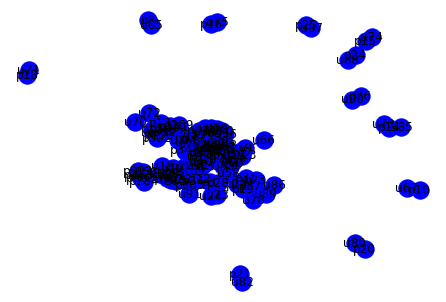

Project relevance of each user 
 langsim {'u6': 0.2857142857142857, 'u1': 0.42857142857142855, 'u5': 0.2857142857142857, 'u4': 0.0}
List of Qualified users with their Experience Level
 QUserExp {'u6': 0.3076923076923077, 'u2': 1.1538461538461537, 'u1': 0.3076923076923077, 'u5': 0.15384615384615385, 'u4': 0.5384615384615384}
total relevance level {'u6': 0.5934065934065934, 'u1': 0.7362637362637363, 'u5': 0.43956043956043955, 'u4': 0.5384615384615384}
{'u1': 1, 'u6': 2, 'u4': 3, 'u5': 4}
Top two recommended developers for the new project [('u1', 1), ('u6', 2)]
['u1', 'u6', 'u4', 'u5']
['u1', 'u6', 'u4', 'u5'] realpredicted
Recommendation Acurracy =  0.5714285714285714


In [30]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
import glob
import csv
import os
import ntpath
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import collections
from sklearn.metrics.pairwise import cosine_similarity
import numpy
from wordcloud import WordCloud, STOPWORDS
import spotlight
from functools import partial
from itertools import islice

#A function for Slicing a dictionary
'''n is the slice rate 
iterable -> the dictionary to be sliced. 
convert the dictionary to a list and use islice function to slice it
'''
def dicslice(n, iterable):
    return list(islice(iterable, n))

#nltk.download('punkt') # if necessary...
''' a stemmer which would be used to reduce 
each word to its root equivalence is built.
this will help reduce the noise in the text document.
this is also built alongside punctuation removal.
'''
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

'''Function that creates tokens to use.'''
def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words=STOPWORDS)

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


path = 'C:\\Users\Reli_New_PC_18\\Documents\\Trust Aware Recommender System for Social Coding Platforms\\Dataset\\githubreadmefiles\\*'

oldProjectReadme = []
newProjectReadme = []
with open('C:\\Users\Reli_New_PC_18\\Documents\\Trust Aware Recommender System for Social Coding Platforms\\Dataset\\githubtestreadme\\'+testfile, 'r' , encoding="utf8") as newPorject:
    dataNew = newPorject.read()
    newProjectReadme.append(dataNew.replace("\n",""))

#print(len(newProjectReadme))
'''for both the new and old readme files, append the name of the files to a list containing the readme texts for each document'''
readmewithname = []
for fname in glob.glob(path):
    with open(fname, 'r', encoding="utf8") as infile:
        data = infile.read()
        oldProjectReadme.append(data.replace("\n",""))
        readmewithname.append((fname,data.replace("\n","")))
        
#print(readmewithname)
first_elts = [x[0] for x in readmewithname]
second_elts = [x[1] for x in readmewithname]
similarityvalues = []
for i in range(len(second_elts)):
    sim = cosine_sim(second_elts[i],newProjectReadme[0] )
    #sim = cosine_similarity(vectorizer.fit_transform(second_elts[i]),vectorizer.fit_transform(newProjectReadme[0])) 
    similarityvalues.append(sim)
    print("Similarity between old and new Readme %d = %f"%(i,sim))
maxi = 0    
for i in range(len(similarityvalues)):
    if similarityvalues[i] > maxi:
        maxi = similarityvalues[i]
        maxIndex = i

print('Maximum similarity value is %f index %d'%(maxi,maxIndex))
print('Similar project is ',ntpath.basename(first_elts[maxIndex]))

targetp = ntpath.basename(first_elts[maxIndex])

F= nx.Graph()
fork_headers = ['user_id','projectid']
forks = pd.read_csv(r"C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\fork.csv",header=None,skiprows=1, names=fork_headers)
fusers = forks.user_id.tolist()
fproj = forks.projectid.tolist()
#print(fusers)
#print(forks.head())
F.add_edges_from(forks.values)
#print(F.edges())

W= nx.Graph()
watch_headers = ['user_id','projectid']
watchers = pd.read_csv(r"C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\watchers.csv",header=None,skiprows=1, names=watch_headers)
wusers = watchers.user_id.tolist()
wproj = watchers.projectid.tolist()
#print(wusers)
#print(watchers.head())
W.add_edges_from(watchers.values)
#print(W.edges())

P= nx.Graph()
pullrequest_headers = ['user_id','projectid']
pullrequest = pd.read_csv(r"C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\pullrequest.csv",header=None,skiprows=1, names=pullrequest_headers)
pusers = pullrequest.user_id.tolist()
pproj = pullrequest.projectid.tolist()
#print(fusers)
#print(forks.head())
P.add_edges_from(pullrequest.values)

C= nx.Graph()
commit_headers = ['user_id','projectid']
commits = pd.read_csv(r"C:\Users\Reli_New_PC_18\Documents\Trust Aware Recommender System for Social Coding Platforms\Dataset\commits.csv",header=None,skiprows=1, names=commit_headers)
cusers = commits.user_id.tolist()
cproj = commits.projectid.tolist()
#print(fusers)
#print(forks.head())
C.add_edges_from(commits.values)

totalusers = set(fusers + wusers + cusers + pusers)
totalprojec = set(fproj + wproj + cproj + pproj)
c = 0
G = nx.DiGraph()
for i in totalusers:
    for j in totalprojec:
        if F.has_edge(i,j) and W.has_edge(i,j) and P.has_edge(i,j) and C.has_edge(i,j):
            #print('user %s found in (%s, %s)'% (i,i,j))
            G.add_edge(i,j)
            c = c + 1

#print(c)
#print(G.edges())
nx.draw(W,with_labels=True,node_color='b')
plt.savefig(testfile+'graph')
plt.show()
occur_users = [u[0] for u in G.edges()]
occur_projects = [u[1] for u in G.edges()]

#max(occur_users, key=occur_users.count)
#nx.draw(F,with_labels=True,node_color='g')
#plt.show()
usercount = Counter(occur_users)

#nx.draw(G,with_labels = True,node_color='y')
#plt.show()

#print( 'Users with the four characteristics to a project ',G.edges() )

Recommended_users = [u[0] for u in G.in_edges(targetp)]

#print('Recommend users for the new project is project members of ',targetp,Recommended_users)

j = dict(usercount)
normUsercount = {}
for key,value in j.items():
    #print('Users Experience level =  {} -> {}'.format(key,value))
    normUsercount[key] = value/len(j)
#print('Normalized Experienced level',normUsercount)

dicOfQualifiedUsers = {}
for u in G.in_edges(targetp):
    dicOfQualifiedUsers[u[0]] = u[1]

QUsers = []   
for key,value in dicOfQualifiedUsers.items():
    QUsers.append(key)

#print('Qualified Users',QUsers)    
#getting the experience level all qualified users
QUserExp = {}
for user in QUsers:
    for key,value in normUsercount.items():
        if user == key:
            QUserExp[user] = value
            
#appending the concepts of the old readme file that selected users have worked with to the user,
#to generate concepts and profile for the user cum developer.
#getting project the Qusers were trusted partakers of 
#for x in occur_users,occur_projects:

QUserProj = {}

for user, project in zip(occur_users, occur_projects):
    if user in QUserExp:
        QUserProj[user] = project

prolang = []
with open("C:\\Users\Reli_New_PC_18\\Documents\\Trust Aware Recommender System for Social Coding Platforms\\Dataset\\githubProjLang\\languages.csv",'r') as Prolang:
    reader = csv.reader(Prolang)
    for row in reader:
        prolang.append(row)
#building a profile based on the programming languages for each user
#convert the programming languages into a dictionary
dicti = {}
for l2 in prolang:
    dicti['p'+l2[0]] = l2[1:]
#print(dicti)
#print(QUserProj)
QUsersProfile = {}
for key,value in QUserProj.items():
    for key1,value1 in dicti.items():
        if value==key1:
            QUsersProfile[key] = value1
#print('Users Programming language Profile',QUsersProfile)
QUsersProfileCount = {}
for key,value in QUsersProfile.items():
    QUsersProfileCount[key] = len(value)

#print('counter for programming languages',QUsersProfileCount)
#QUsersProfileCount = dict(Counter(QUsersProfileCount))

newprolang = []
with open("C:\\Users\Reli_New_PC_18\\Documents\\Trust Aware Recommender System for Social Coding Platforms\\Dataset\\newprojectreadme\\pnewlang.csv",'r') as NewProlang:
    reader = csv.reader(NewProlang)
    for row in reader:
        newprolang.append(row)
#building a profile based on the programming languages for each project
newdicti = {}
for l2 in newprolang:
    newdicti[l2[0]] = l2[1:]
#print('new dictionary',newdicti)
langsim = {}
for key,value in QUsersProfile.items():
    lang_sim = set(value).intersection(set(newdicti['pnew']))
    langsim[key] = len(lang_sim)/len(set(newdicti['pnew']))
print('Project relevance of each user \n langsim',langsim)
print('List of Qualified users with their Experience Level\n QUserExp',QUserExp)
totalRel = {}
for key,value in QUserExp.items():
    for k1,v2 in langsim.items():
        if key in langsim and k1 in QUserExp:
            totalRel[key] = QUserExp[key] + langsim[key]
print('total relevance level',totalRel)
sorted(totalRel,key=totalRel.get, reverse=True)
Recommendation_list = {key: rank for rank, key in enumerate(sorted(totalRel, key=totalRel.get, reverse=True), 1)}
print(Recommendation_list)
n_recomm = dicslice(2,Recommendation_list.items())
print('Top two recommended developers for the new project',n_recomm)
predicted_users = [x for x in Recommendation_list]
print(predicted_users)
count = 0
real_predicted = []
for user in predicted_users:
    if user in testusers:
        count = count + 1
        real_predicted.append(user)
print(real_predicted,'realpredicted')
acurracy = count/len(testusers)
print('Recommendation Acurracy = ',acurracy)

dict_keys(['u3', 'u6', 'u13', 'u7', 'u2', 'u19', 'u1', 'u1o', 'u5', 'u9', 'u4', 'u11', 'u10']) dict_keys(['u6', 'u2', 'u1', 'u5', 'u4'])
[0, 0, 0, 0, 0.3076923076923077, 0.3076923076923077, 0.15384615384615385, 1.1538461538461537, 0, 0, 0, 0, 0.5384615384615384]
[2, 1, 1, 1, 4, 4, 2, 15, 2, 6, 1, 6, 7]


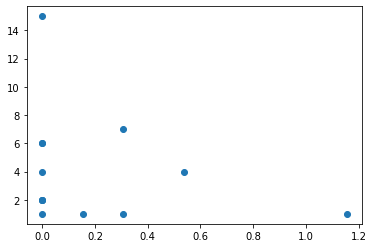

Correlation between Trusted Users and Experience level =  0.8775908851319222


In [28]:
keys = set(totalRel.keys()) | set(j.keys())
keys1 = list(QUserExp.keys() | j.keys())
print(j.keys(), QUserExp.keys())

print([QUserExp.get(x, 0) for x in keys1])
print([j.get(x, 0) for x in keys1])
x = [QUserExp.get(x, 0) for x in keys1]
y = [j.get(x, 0) for x in keys]
plt.scatter(x,y)
plt.savefig(testfile+'userexp')
plt.show()


print('Correlation between Trusted Users and Experience level = ',numpy.corrcoef(
    [QUserExp.get(x, 0) for x in keys1],
    [j.get(x, 0) for x in keys1])[0, 1])

dict_keys(['u3', 'u6', 'u13', 'u7', 'u2', 'u19', 'u1', 'u1o', 'u5', 'u9', 'u4', 'u11', 'u10']) dict_keys(['u6', 'u1', 'u5', 'u4'])
[0, 0.2857142857142857, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.2857142857142857, 0, 0.42857142857142855]
[2, 4, 2, 1, 1, 7, 1, 1, 6, 6, 2, 15, 4]


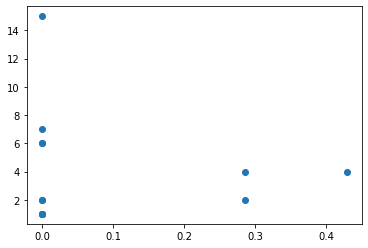

Correlation between programming language similarity and Trusted developers =  -0.08063265719515625


In [29]:

keys =  set(langsim.keys()) | set(j.keys())

print(j.keys(), langsim.keys())

print([langsim.get(x, 0) for x in keys])
print([j.get(x, 0) for x in keys])
x = [langsim.get(x, 0) for x in keys]
y = [j.get(x, 0) for x in keys]
plt.scatter(x,y)
plt.savefig(testfile+'langsim')
plt.show()

print('Correlation between programming language similarity and Trusted developers = ',numpy.corrcoef(
    [langsim.get(x, 0) for x in keys],
    [j.get(x, 0) for x in keys])[0, 1])